In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from datetime import datetime
import matplotlib as mpl
from __future__ import unicode_literals
from IPython.core.display import display, HTML

%matplotlib inline

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 50)

In [3]:
def totimestamp(dt, epoch=datetime(1970,1,1)):
        td = dt - epoch
        #return td.total_seconds()
        return (td.microseconds + (td.seconds + td.days * 86400) * 10**6) 

In [4]:
files = glob.glob('namd-ws-128cores-trial1/enmd_pat_overhead.csv')
pipelines = 16
index = []
for s in range(1,8):
    index+=['stage_%s-start'%s]
    #index+=['stage_%s-stop'%s]
df_starts = pd.DataFrame(columns=[p+1 for p in range(pipelines)], index=index)

for f in files:
    lines = open(f,'r').readlines()
    lines = [entry for entry in lines if entry != '\n']
    for line in lines[1:]:
        stage, pipeline, probe, time = line.split(',')
    
        stage_num = stage.split('_')[1]
        pipeline_num = pipeline.split('_')[1]
        if probe == 'wait_time':
            state = 'start'
            timestamp = totimestamp(datetime.strptime(time.strip(), "%Y-%m-%d %H:%M:%S.%f"))/ 10**6
            df_starts.loc['stage_%s-%s'%(stage_num,state)][pipeline_num] = timestamp
            
        #if probe == 'res_time':
        #    state = 'stop'
        #    timestamp = totimestamp(datetime.strptime(time.strip(), "%Y-%m-%d %H:%M:%S.%f"))/ 10**6
        #    df.loc['stage_%s-%s'%(stage_num,state)][pipeline_num] = timestamp
            
df = df_starts.T

In [5]:
files = glob.glob('namd-ws-128cores-trial1/enmd_pat_overhead.csv')
pipelines = 16
index = []
for s in range(1,8):
    #index+=['stage_%s-start'%s]
    index+=['stage_%s-stop'%s]
    
df_stops = pd.DataFrame(columns=[p+1 for p in range(pipelines)], index=index)

for f in files:
    lines = open(f,'r').readlines()
    lines = [entry for entry in lines if entry != '\n']
    for line in lines[1:]:
        stage, pipeline, probe, time = line.split(',')
    
        stage_num = stage.split('_')[1]
        pipeline_num = pipeline.split('_')[1]
        #if probe == 'wait_time':
        #    state = 'start'
        #    timestamp = totimestamp(datetime.strptime(time.strip(), "%Y-%m-%d %H:%M:%S.%f"))/ 10**6
        #    df.loc['stage_%s-%s'%(stage_num,state)][pipeline_num] = timestamp
            
        if probe == 'res_time':
            state = 'stop'
            timestamp = totimestamp(datetime.strptime(time.strip(), "%Y-%m-%d %H:%M:%S.%f"))/ 10**6
            df_stops.loc['stage_%s-%s'%(stage_num,state)][pipeline_num] = timestamp
            
df_stops = df_stops.T


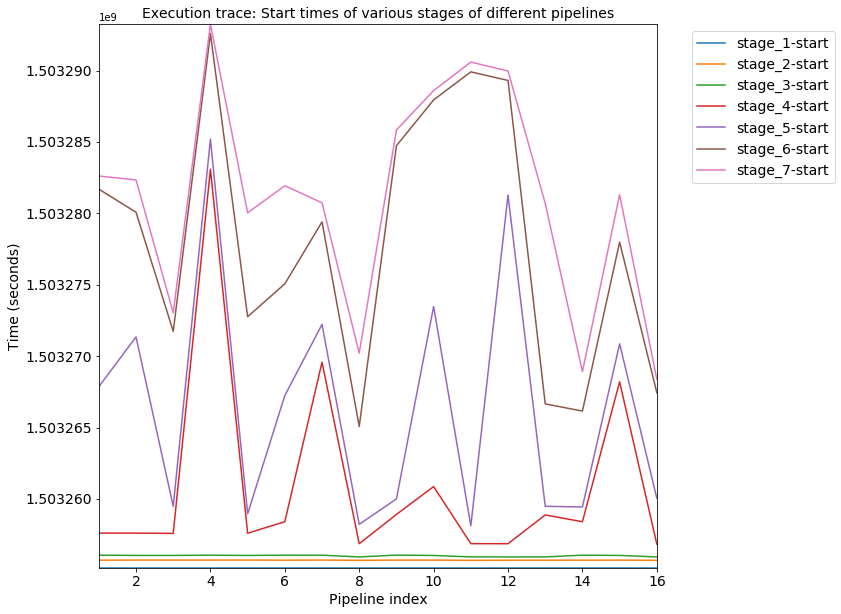

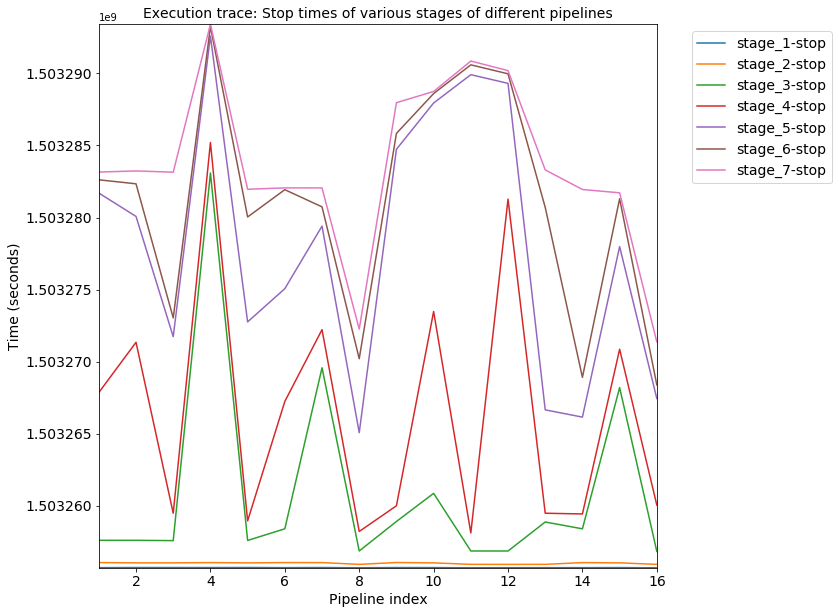

In [15]:
FONTSIZE=14

ax = df.plot(kind='line', figsize=(10,10), ylim=(df_starts.min().min(), df_starts.max().max()), fontsize=FONTSIZE)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, fontsize=FONTSIZE)
ax.set_xlabel('Pipeline index', fontsize=FONTSIZE)
ax.set_ylabel('Time (seconds)', fontsize=FONTSIZE)
ax.set_title('Execution trace: Start times of various stages of different pipelines', fontsize=FONTSIZE)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ticklabel_format(useOffset=False)

ax = df_stops.plot(kind='line', figsize=(10,10), ylim=(df_stops.min().min(), df_stops.max().max()), fontsize=FONTSIZE)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, fontsize=FONTSIZE)
ax.set_xlabel('Pipeline index', fontsize=FONTSIZE)
ax.set_ylabel('Time (seconds)', fontsize=FONTSIZE)
ax.set_title('Execution trace: Stop times of various stages of different pipelines', fontsize=FONTSIZE)
plt.ticklabel_format(useOffset=False)